In [37]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import pickle

Re-loading the dataset in every run

In [2]:
file_path = r"C:\Users\01psd\OneDrive\Desktop\MP sem 6\Metro_Interstate_Traffic_Volume.csv"
def load_dataset():
    return pd.read_csv(file_path)

data = load_dataset()
data

date_time is_holiday  air_pollution_index  humidity  \
0      02-10-2012 15:00        Yes                  184        64   
1      02-10-2012 16:00        Yes                  167        64   
2      02-10-2012 17:00        Yes                  119        63   
3      02-10-2012 18:00        Yes                  161        63   
4      02-10-2012 19:00        Yes                  243        62   
...                 ...        ...                  ...       ...   
33739  17-05-2017 21:00        Yes                   74        85   
33740  17-05-2017 22:00        Yes                   81        70   
33741  17-05-2017 22:00         No                  138        70   
33742  17-05-2017 23:00         No                  229        66   
33743  17-05-2017 23:00        Yes                  140        63   

       visibility_in_miles  temperature  clouds_all weather_type  \
0                        7       283.73           1        Clear   
1                        7       305.86           1        Clear   
2                        6       306.14          20       Clouds   
3                        3       305.10          20       Clouds   
4                        8       302.97          20       Clouds   
...                    ...          ...         ...          ...   
33739                    7       299.88          90         Mist   
33740                    2       298.95          90         Rain   
33741                    1       298.95          90         Mist   
33742                    6       297.75          90         Rain   
33743                    8       297.75          90         Mist   

        weather_description  traffic_volume  hour  month_day  weekday  month  \
0              sky is clear            5584    15          2        2     10   
1              sky is clear            6015    16          2        2     10   
2                few clouds            5791    17          2        2     10   
3                few clouds            4770    18          2        2     10   
4                few clouds            3539    19          2        2     10   
...                     ...             ...   ...        ...      ...    ...   
33739                  mist            2348    21         17        3      5   
33740  heavy intensity rain            2194    22         17        3      5   
33741                  mist            2194    22         17        3      5   
33742  heavy intensity rain            1328    23         17        3      5   
33743                  mist            1328    23         17        3      5   

       year  
0      2012  
1      2012  
2      2012  
3      2012  
4      2012  
...     ...  
33739  2017  
33740  2017  
33741  2017  
33742  2017  
33743  2017  

[33744 rows x 15 columns]

Converting the date to UNIX date-time taaki date-time format mein reference le saku

In [3]:
def posix_time(dt):
    return (dt - datetime(1970, 1, 1)) / timedelta(seconds=1)

ERROR DURING INITIAL RUN; AB SOLVED HAI || Loading the dataset (nahi chahiye, we are re-loading the dataset every run taaki har baar data mein changes save na ho)


In [4]:
# data = pd.read_csv('MP_traffic_data.csv')

Pre-processing the data, because zaruri hai boss

In [5]:
data = data.sort_values(by=['date_time'], ascending=True).reset_index(drop=True)
data = data.dropna().reset_index(drop=True)
data.loc[data['is_holiday'] == 'Yes', 'is_holiday'] = 1
data.loc[data['is_holiday'] == 'No', 'is_holiday'] = 0

In [6]:
data['temperature'] -= 273

In [7]:
'''data['date_time'] = pd.to_datetime(data['date_time'])
data['hour'] = data['date_time'].map(lambda x: int(x.strftime("%H")))
data['month_day'] = data['date_time'].map(lambda x: int(x.strftime("%d")))
data['weekday'] = data['date_time'].map(lambda x: x.weekday()+1)
data['month'] = data['date_time'].map(lambda x: int(x.strftime("%m")))
data['year'] = data['date_time'].map(lambda x: int(x.strftime("%Y")))
data.to_csv("traffic_volume_data.csv", index=None)'''

'data[\'date_time\'] = pd.to_datetime(data[\'date_time\'])\ndata[\'hour\'] = data[\'date_time\'].map(lambda x: int(x.strftime("%H")))\ndata[\'month_day\'] = data[\'date_time\'].map(lambda x: int(x.strftime("%d")))\ndata[\'weekday\'] = data[\'date_time\'].map(lambda x: x.weekday()+1)\ndata[\'month\'] = data[\'date_time\'].map(lambda x: int(x.strftime("%m")))\ndata[\'year\'] = data[\'date_time\'].map(lambda x: int(x.strftime("%Y")))\ndata.to_csv("traffic_volume_data.csv", index=None)'

In [8]:
data.head()

date_time is_holiday  air_pollution_index  humidity  \
0  01-01-2013 00:00          1                  260        72   
1  01-01-2013 01:00          1                  161        72   
2  01-01-2013 02:00          0                  205        78   
3  01-01-2013 03:00          0                  135        78   
4  01-01-2013 04:00          1                   52        85   

   visibility_in_miles  temperature  clouds_all weather_type  \
0                    4         2.49          58       Clouds   
1                    7         2.78          40       Clouds   
2                    3         3.16          75         Snow   
3                    8         2.95          90       Clouds   
4                    7         2.65          90       Clouds   

  weather_description  traffic_volume  hour  month_day  weekday  month  year  
0       broken clouds            1439     0          1        2      1  2013  
1    scattered clouds            1502     1          1        2      1  2013  
2          heavy snow             933     2          1        2      1  2013  
3     overcast clouds             576     3          1        2      1  2013  
4     overcast clouds             372     4          1        2      1  2013

Plot graphs ka font

In [9]:
sns.set_theme(style="darkgrid")
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.unicode_minus'] = False

Data Preparation for machine-modeling

In [10]:
warnings.filterwarnings('ignore')
data = data.sample(10000).reset_index(drop=True)
textual_columns = ['weather_type', 'weather_description']
numeric_columns = ['is_holiday', 'temperature', 'weekday', 'hour', 'month_day', 'year', 'month']

In [11]:
features = numeric_columns + textual_columns
X = data[features]

In [12]:
X.head()

is_holiday  temperature  weekday  hour  month_day  year  month weather_type  \
0          1        -3.58        3     1         11  2017      1       Clouds   
1          0        13.08        5    15         18  2016     11         Snow   
2          0        22.42        7    12         11  2012     11         Mist   
3          1        14.49        5     8         11  2015     12       Clouds   
4          0        28.48        1    10         22  2013      7         Rain   

    weather_description  
0       overcast clouds  
1            heavy snow  
2                  mist  
3       overcast clouds  
4  heavy intensity rain

In [13]:
X.shape

(10000, 9)

yaha maine weather type aur description ko numerical values mein laane ke liye, uske occurences ko positional values mein laaya 
jisse model mein saare unique weather type aur description ke elements ko ek unique value assign hojaye

In [14]:
F1 = list(data['weather_type'])
F2 = list(data['weather_description'])

In [15]:
F1_features = ['Rain', 'Clear', 'Clouds', 'Drizzle', 'Mist', 'Haze', 'Fog', 'Snow', 'Thunderstorm', 'Smoke', 'Squall']
F2_features = ['light rain', 'sky is clear', 'broken clouds', 'overcast clouds', 'drizzle', 'mist', 'haze', 'fog', 'light snow', 'thunderstorm', 'heavy snow', 'Sky is Clear', 'heavy intensity rain', 'moderate rain', 'scattered clouds', 'few clouds', 'very heavy rain', 'light intensity drizzle', 'thunderstorm with heavy rain', 'snow', 'proximity thunderstorm', 'proximity thunderstorm with rain', 'thunderstorm with light rain', 'proximity shower rain', 'thunderstorm with rain', 'heavy intensity drizzle', 'thunderstorm with drizzle', 'smoke', 'sleet', 'light rain and snow', 'thunderstorm with light drizzle', 'proximity thunderstorm with drizzle', 'SQUALLS', 'shower drizzle', 'freezing rain', 'shower snow']

In [16]:
final_F1 = []
final_F2 = []

In [17]:
for i in F1:
    if i not in F1_features:
        final_F1.append(0)
    else:
        final_F1.append((F1_features.index(i))+1)
for i in F2:
    if i not in F2_features:
        final_F2.append(0)
    else:
        final_F2.append((F2_features.index(i))+1)

In [18]:
data['weather_type'] = final_F1
data['weather_description'] = final_F2

In [19]:
data.head()

date_time is_holiday  air_pollution_index  humidity  \
0  11-01-2017 01:00          1                  268        62   
1  18-11-2016 15:00          0                  196        86   
2  11-11-2012 12:00          0                  255        90   
3  11-12-2015 08:00          1                  186        69   
4  22-07-2013 10:00          0                  181        49   

   visibility_in_miles  temperature  clouds_all  weather_type  \
0                    6        -3.58          90             3   
1                    6        13.08          90             8   
2                    6        22.42          90             5   
3                    9        14.49          90             3   
4                    8        28.48           0             1   

   weather_description  traffic_volume  hour  month_day  weekday  month  year  
0                    4             292     1         11        3      1  2017  
1                   11            4872    15         18        5     11  2016  
2                    6            3710    12         11        7     11  2012  
3                    4            5570     8         11        5     12  2015  
4                   13            4503    10         22        1      7  2013

idhar maine updated data ko dump kiya hai jisse hum application run karenge # DUMP 1

In [20]:
# updated_data = data
# with open('dump_updated.pkl', 'wb') as f:
#     pickle.dump(updated_data, f)

In [22]:
features = numeric_columns + textual_columns
target = ['traffic_volume']

In [23]:
X = data[features] # 9 features
Y = data[target] # traffic volume
print(type(X), type(Y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


FINAL RUN: SOLVED || Dumping the input feature i.e X and the pre-processed, transformed data through pickle to a local host

In [24]:
# with open('input_Y.pkl', 'wb') as f:
#     pickle.dump(Y, f)

Glimpse of the features

In [25]:
X.head(10)

is_holiday  temperature  weekday  hour  month_day  year  month  \
0          1        -3.58        3     1         11  2017      1   
1          0        13.08        5    15         18  2016     11   
2          0        22.42        7    12         11  2012     11   
3          1        14.49        5     8         11  2015     12   
4          0        28.48        1    10         22  2013      7   
5          0        24.66        6     5          2  2016      7   
6          1        -3.66        4     4         12  2017      1   
7          0        35.72        7    21         22  2016      5   
8          0        -9.73        4    19          2  2014      1   
9          0         9.91        6     2         26  2015     12   

   weather_type  weather_description  
0             3                    4  
1             8                   11  
2             5                    6  
3             3                    4  
4             1                   13  
5             3                    3  
6             3                    4  
7             3                    3  
8             2                    2  
9             8                    9

In [26]:
Y.head(10)

traffic_volume
0             292
1            4872
2            3710
3            5570
4            4503
5             679
6             843
7            2624
8            2763
9             302

THODA SA GRAPH PLOTTING

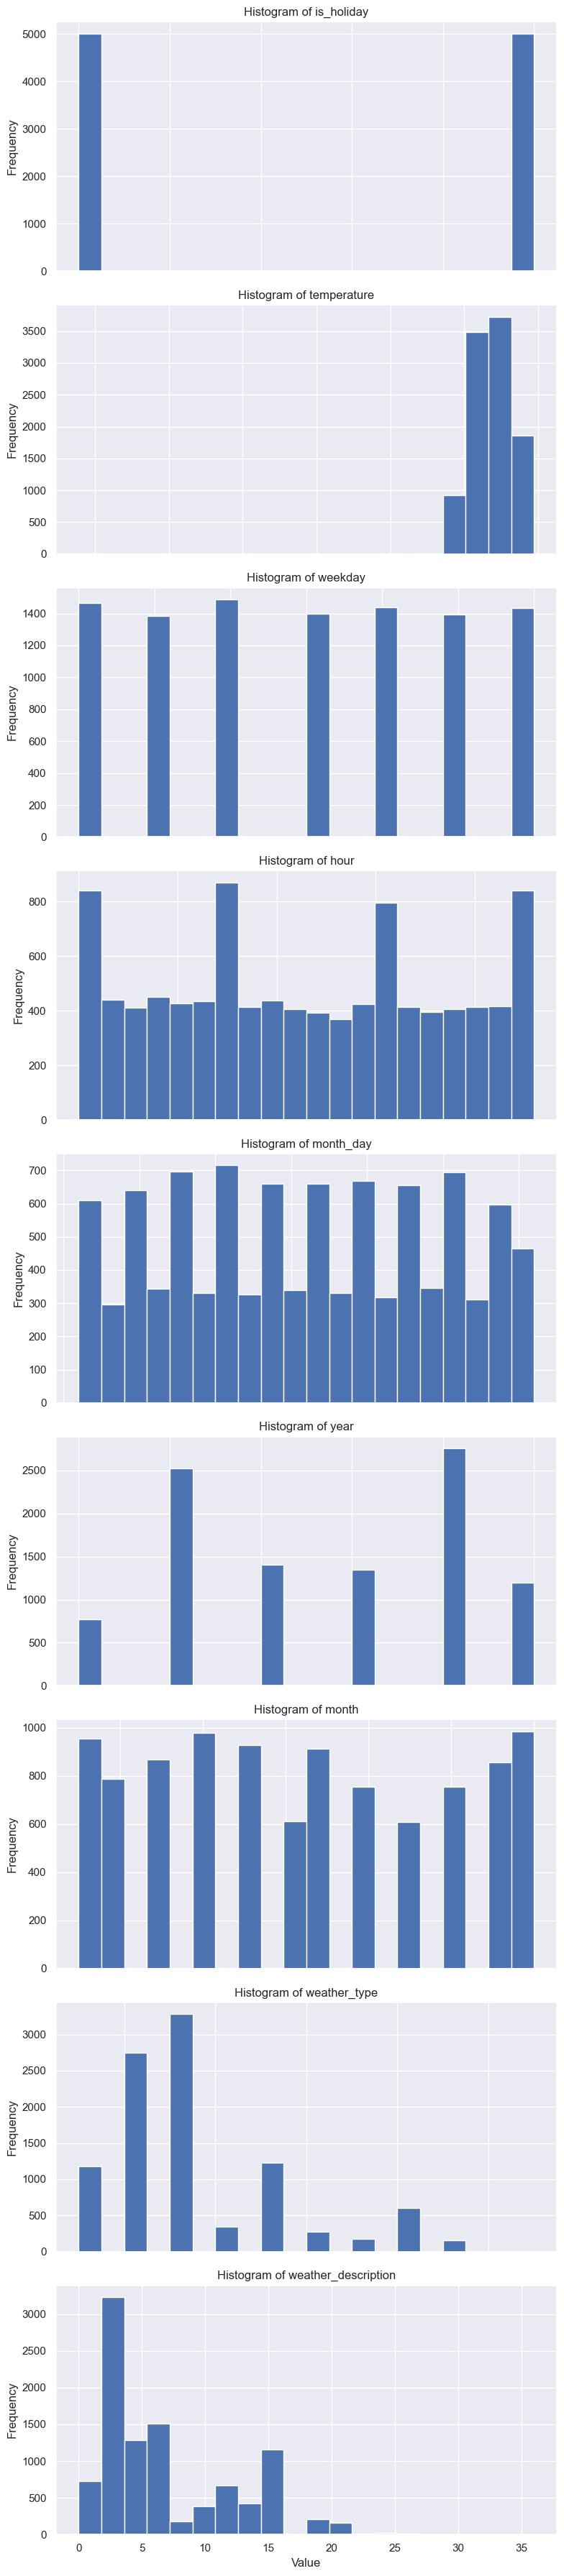

In [27]:
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(len(features), 1, figsize=(8, 4*len(features)))
for i, feature in enumerate(features):
    ax = axes[i]
    data[feature].hist(bins=20, ax=ax)
    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.grid(True)
    if i < len(features) - 1:
        ax.set_xlabel('')
        ax.set_xticklabels([])
    else:
        ax.set_xlabel('Value')
plt.tight_layout()
plt.show()

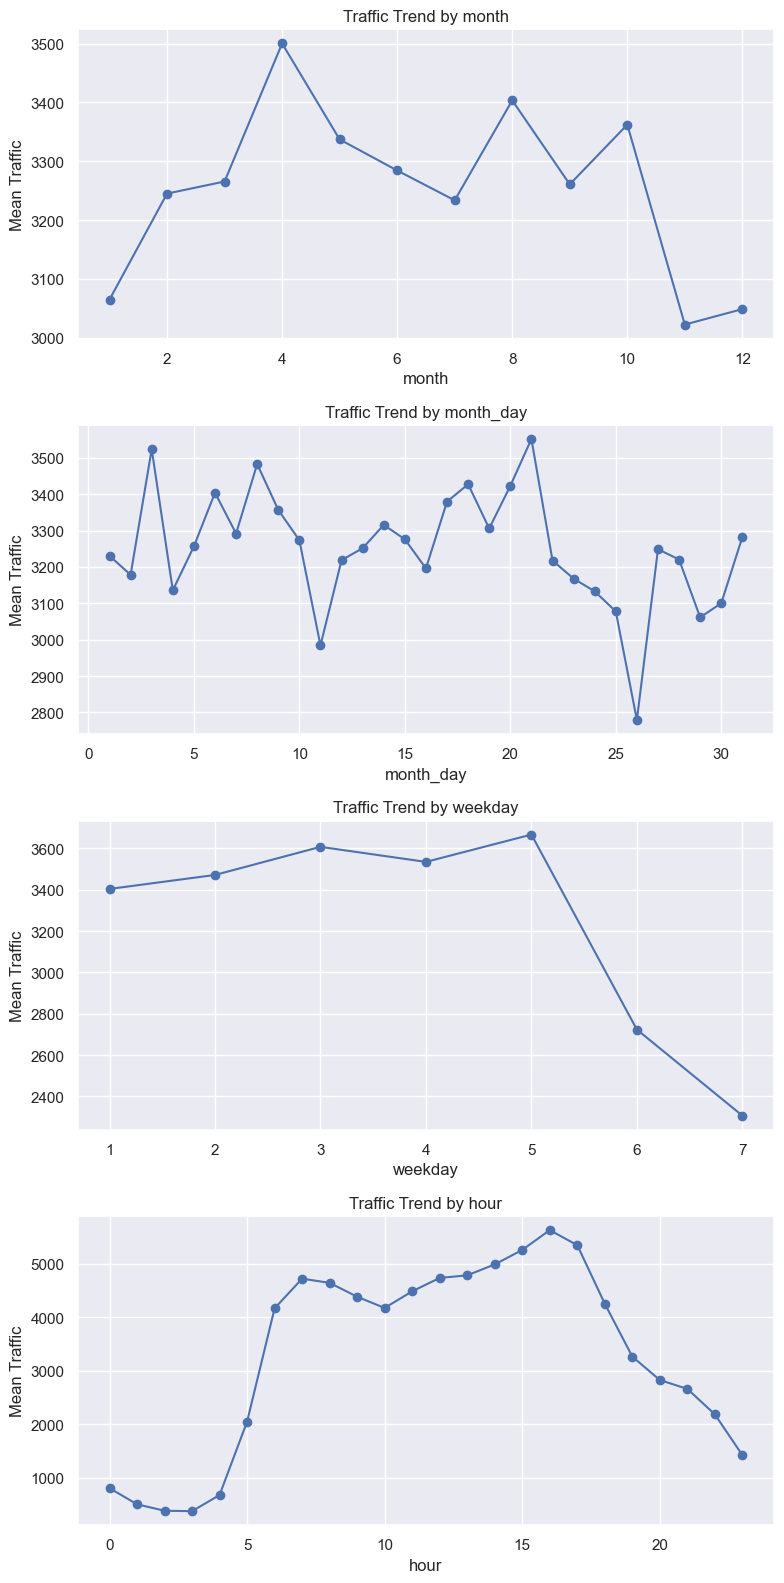

In [28]:
metrics = ['month', 'month_day', 'weekday', 'hour']
fig = plt.figure(figsize=(8, 4*len(metrics)))
for i, metric in enumerate(metrics):
	ax = fig.add_subplot(len(metrics), 1, i+1)
	ax.plot(data.groupby(metric)['traffic_volume'].mean(), '-o')
	ax.set_xlabel(metric)
	ax.set_ylabel("Mean Traffic")
	ax.set_title(f"Traffic Trend by {metric}")
plt.tight_layout()
plt.show()

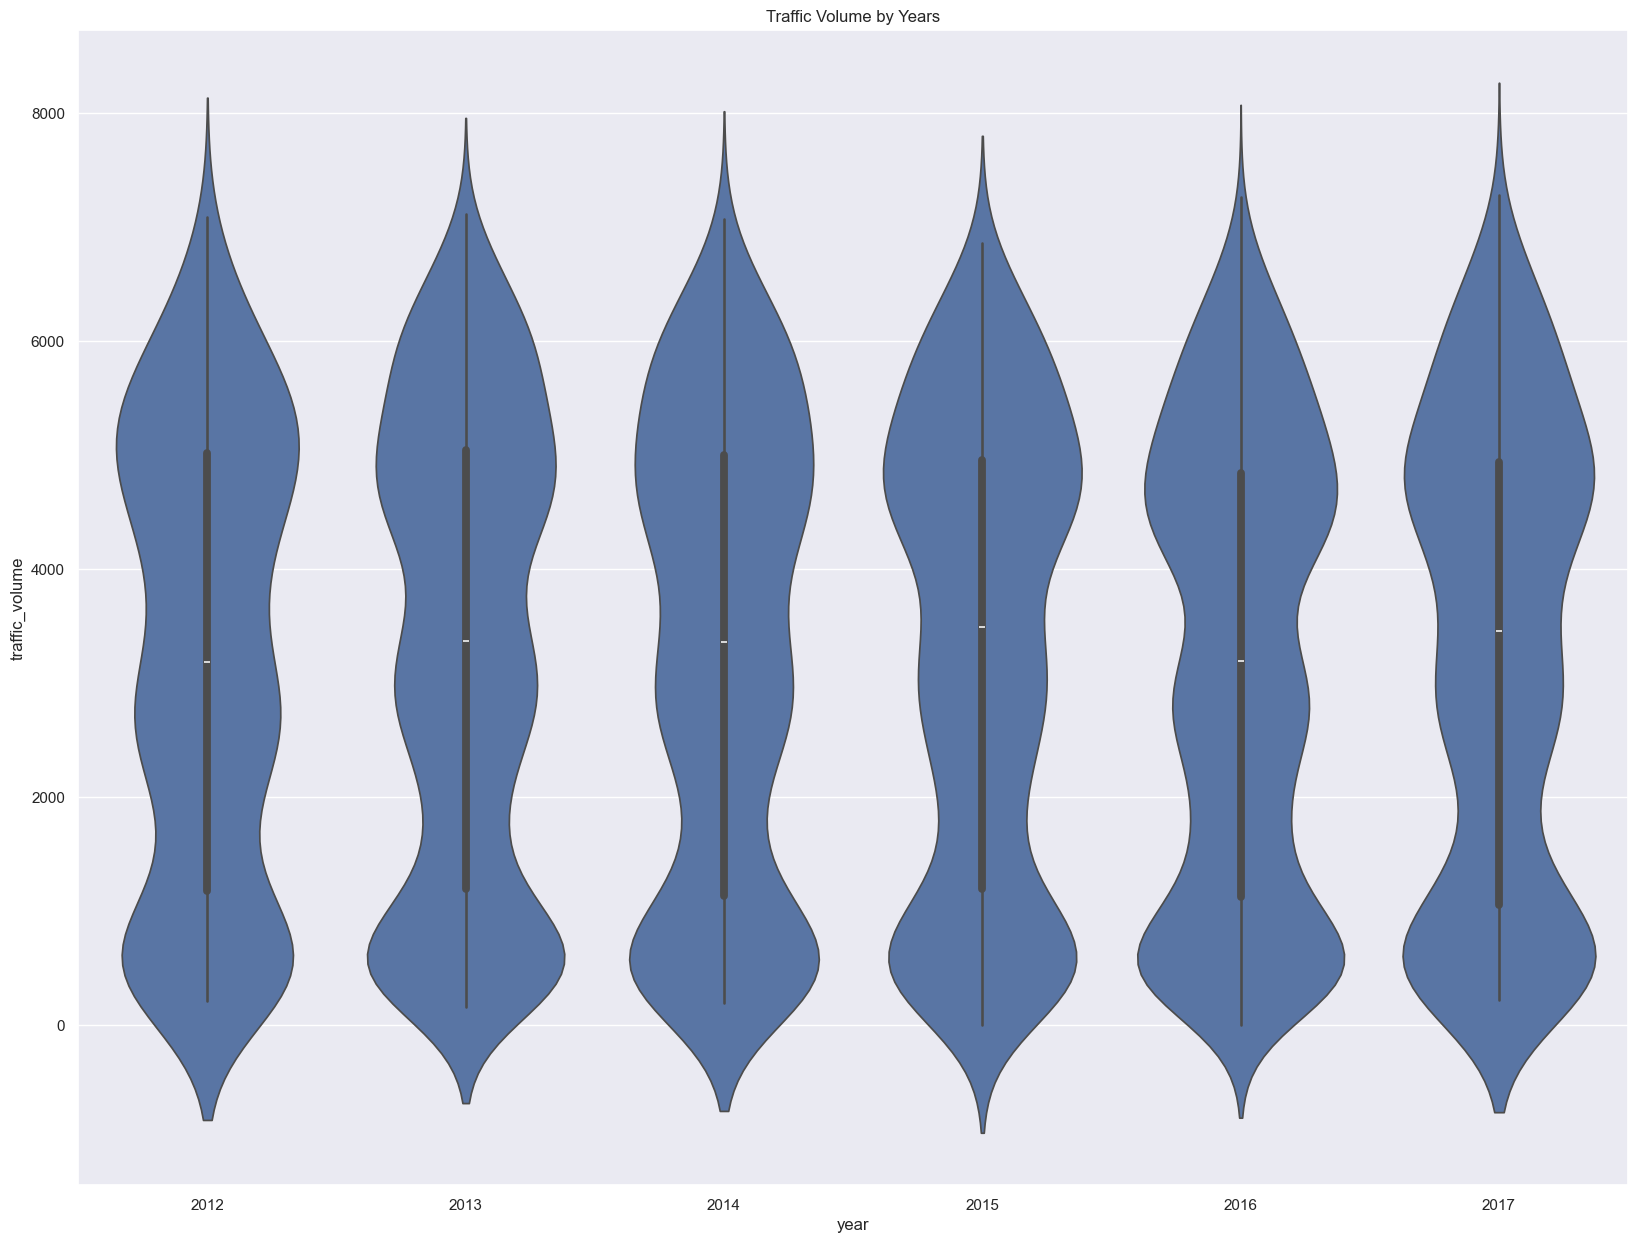

In [70]:
plt.figure(figsize=(20,15))
sns.violinplot(y=data['traffic_volume'], x=data['year'])
plt.title('Traffic Volume by Years')
plt.show()

TRAFFIC VOLUME vs TEMP

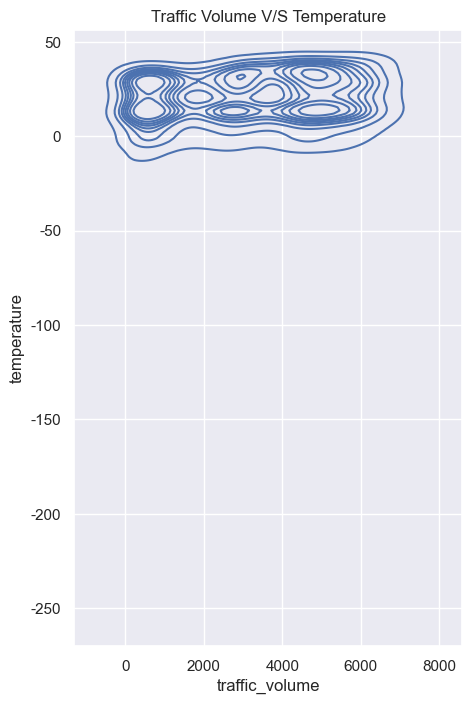

In [55]:
plt.figure(figsize=(5,8))
sns.kdeplot(data=data, x="traffic_volume", y="temperature")
plt.title('Traffic Volume V/S Temperature')
plt.show()

WEATHER DISTRIBUTION

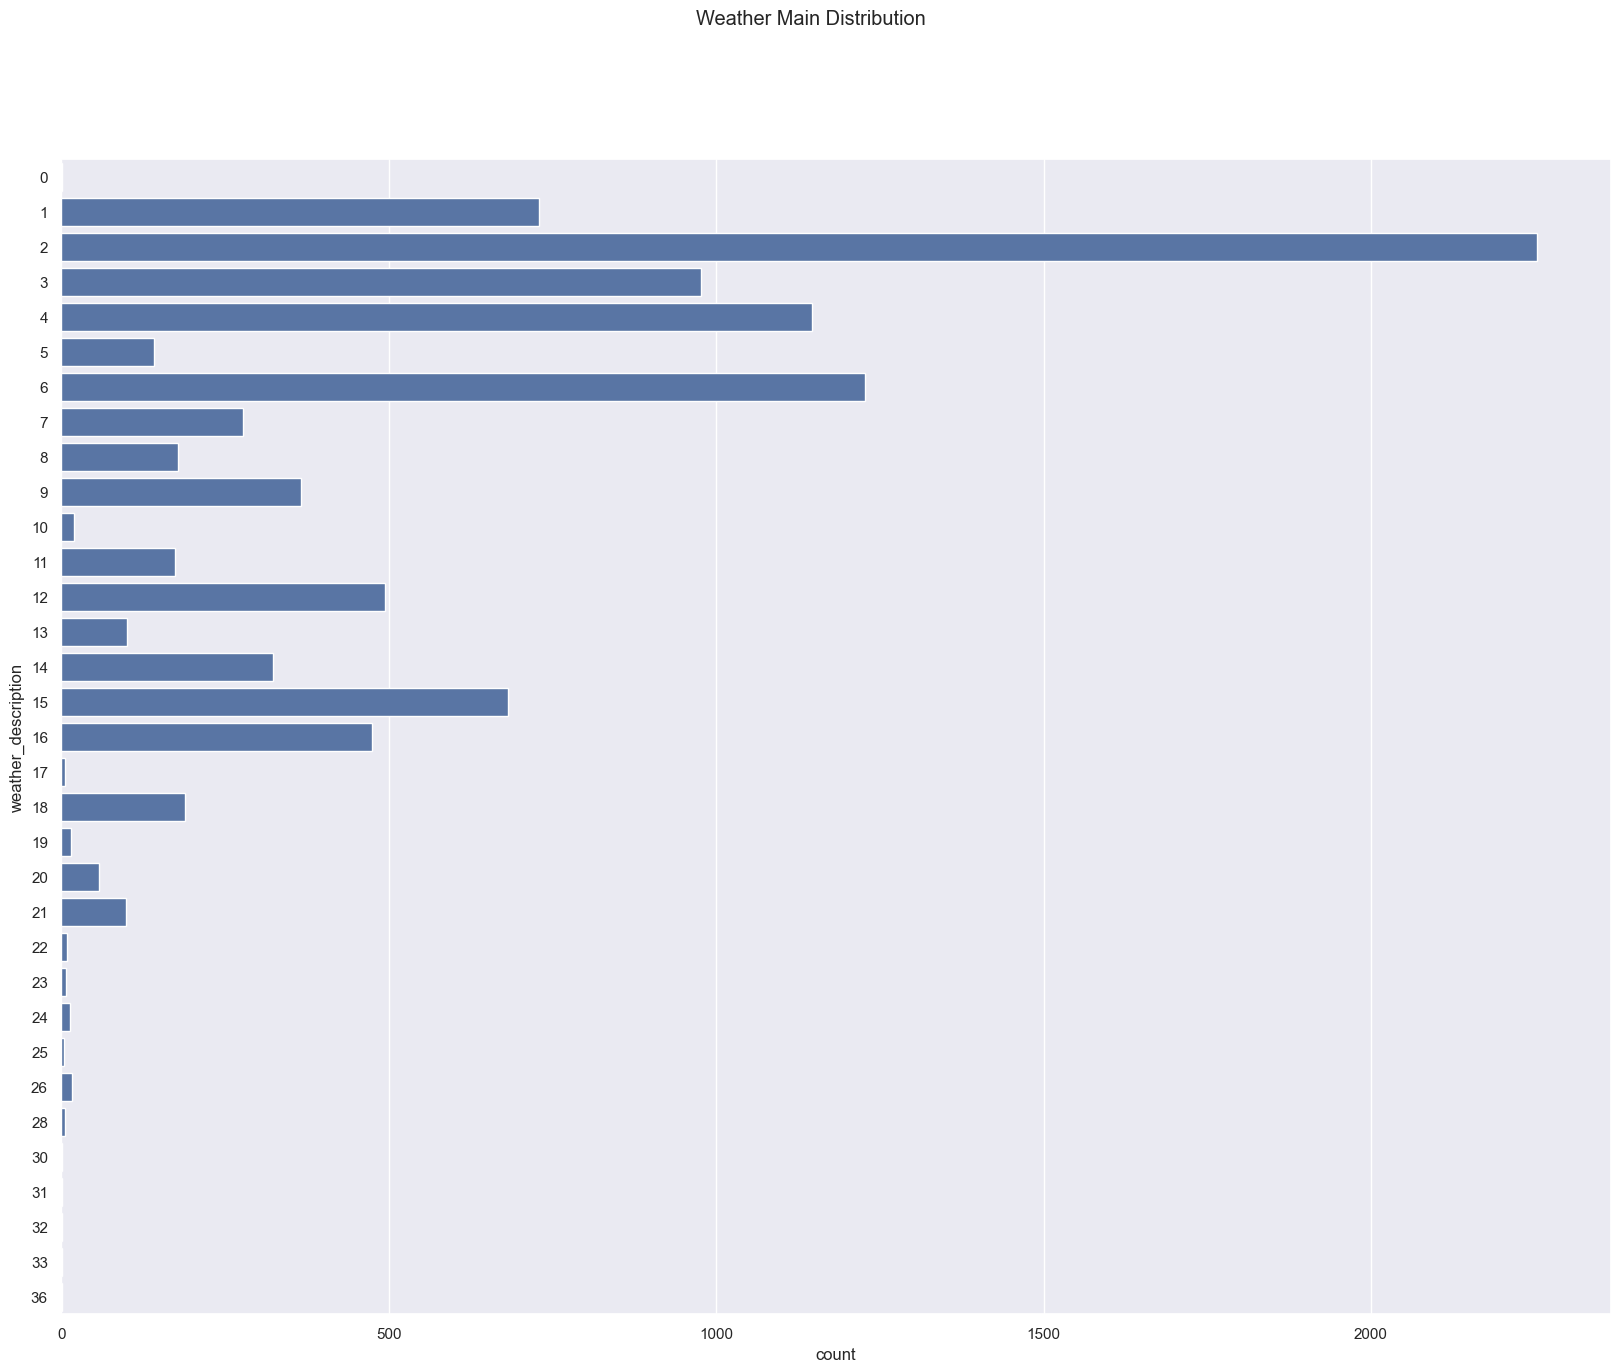

In [60]:
fig, ax = plt.subplots(figsize=(20,15))
fig.suptitle('Weather Main Distribution')
sns.countplot(y=data['weather_description'])
plt.show()

PAIRPLOT

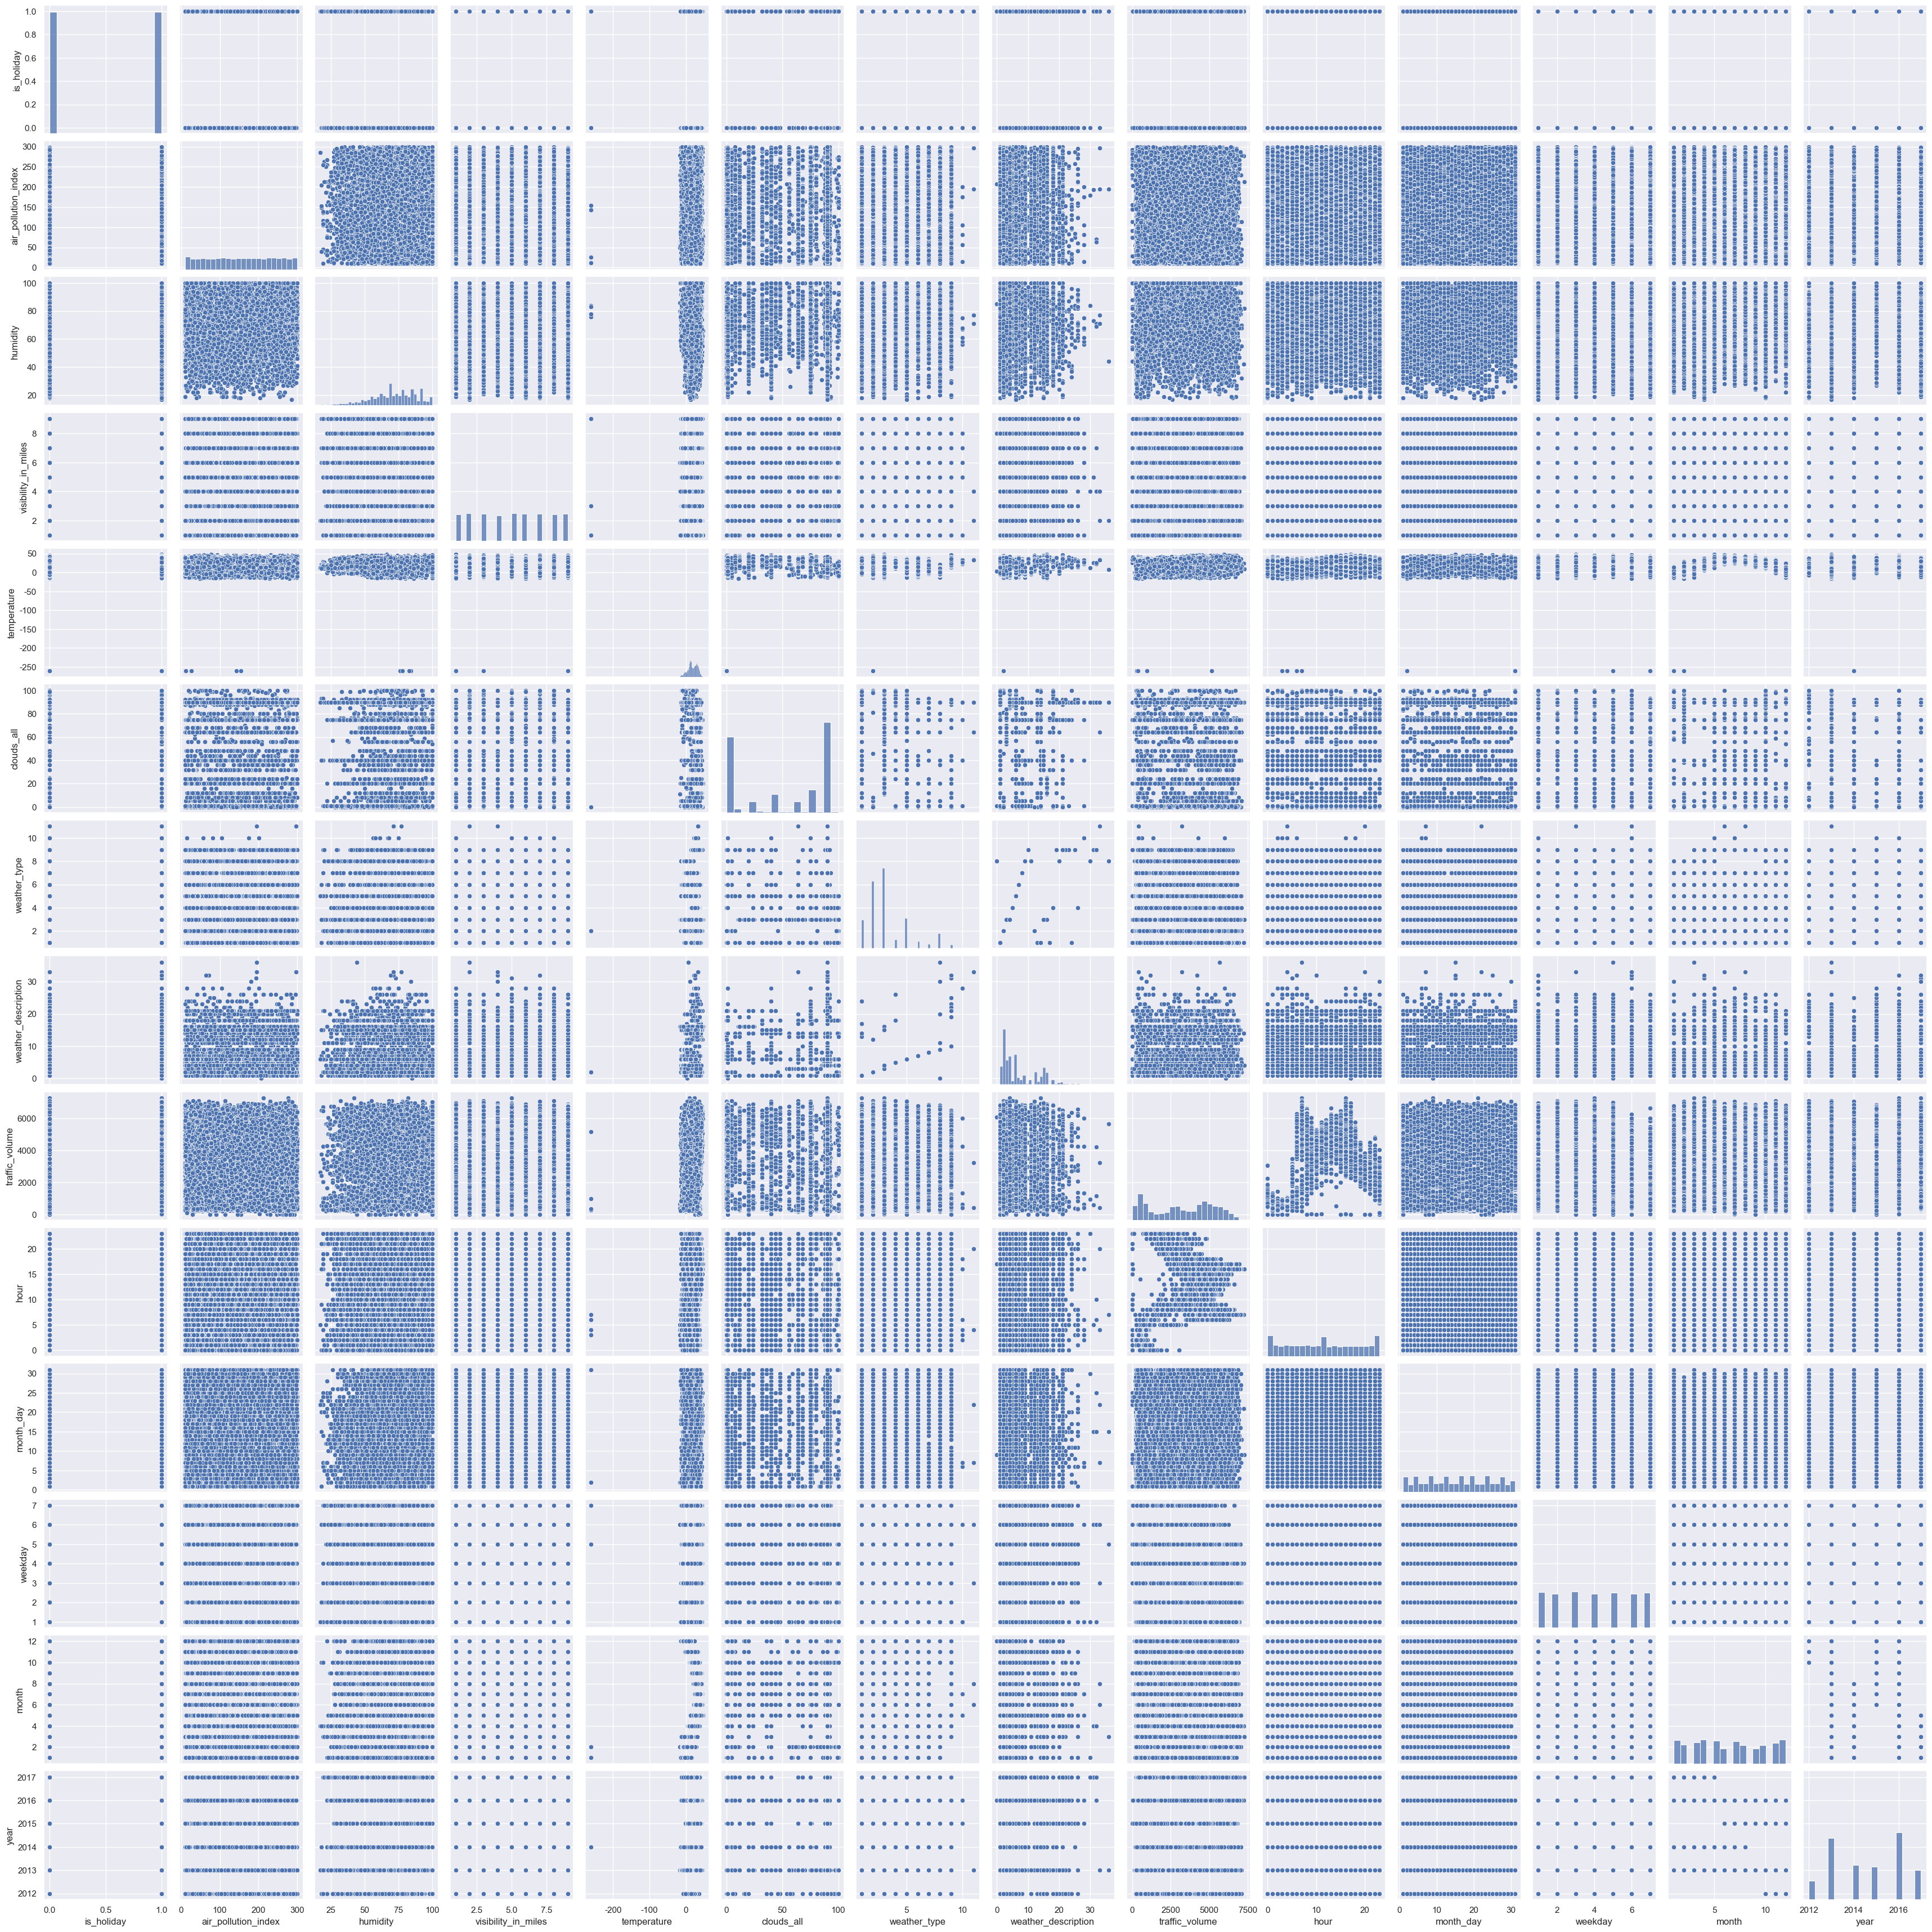

In [61]:
sns.pairplot(data)
plt.show()

TRAFFIC VS TIME (LAST KE 200 SAMPLES)

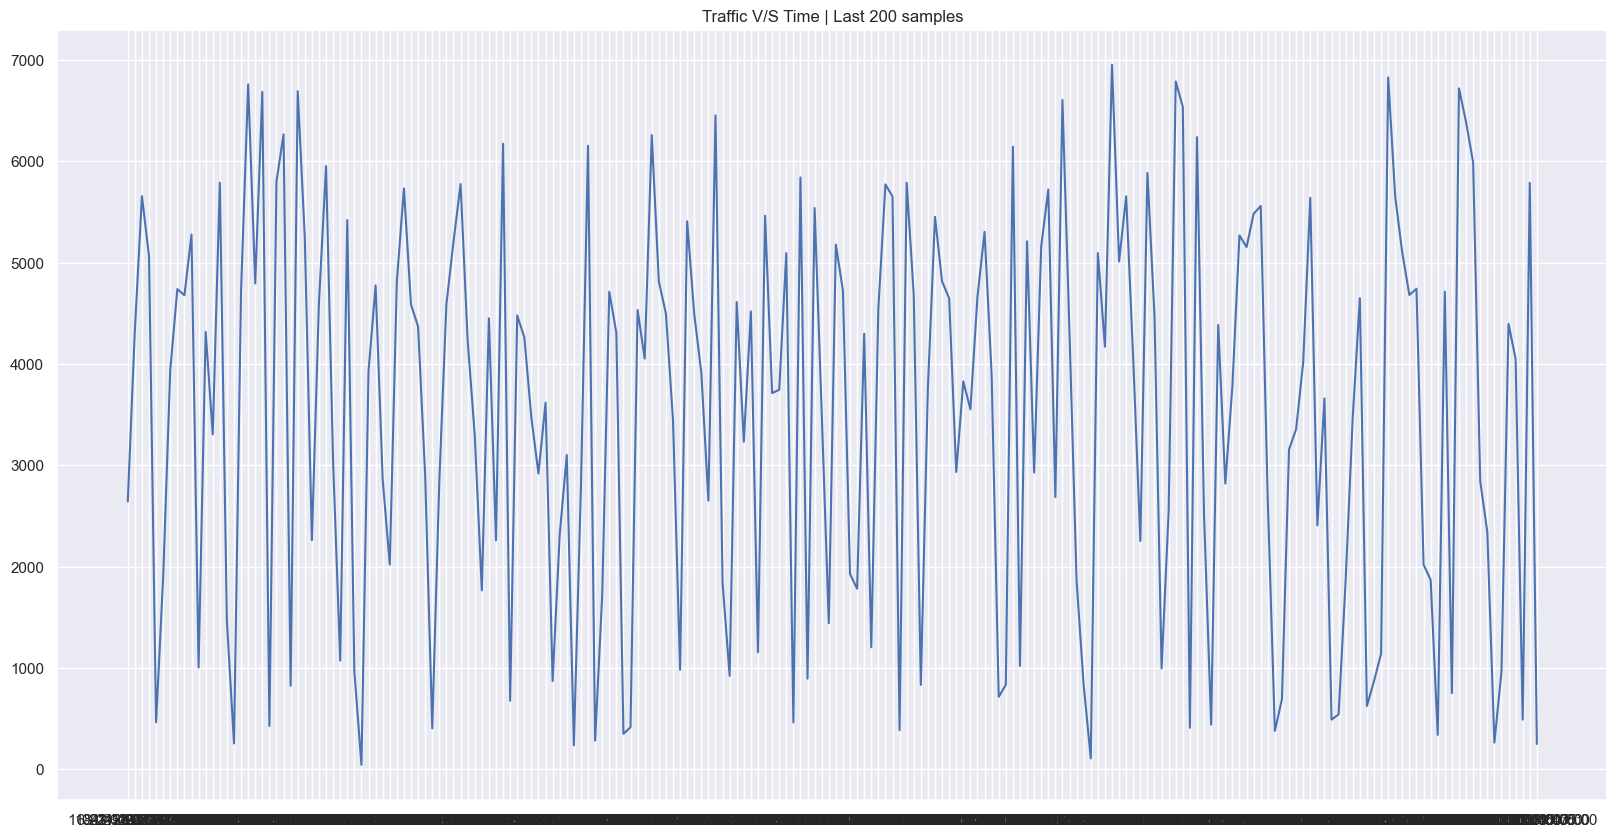

In [64]:
fig, ax = plt.subplots(figsize=(20,10))
last = 200
sns.lineplot(x=data['date_time'].values[-last:],y=data['traffic_volume'].values[-last:])
plt.title(f'Traffic V/S Time | Last {last} samples')
plt.show()

CLOUDS distribution

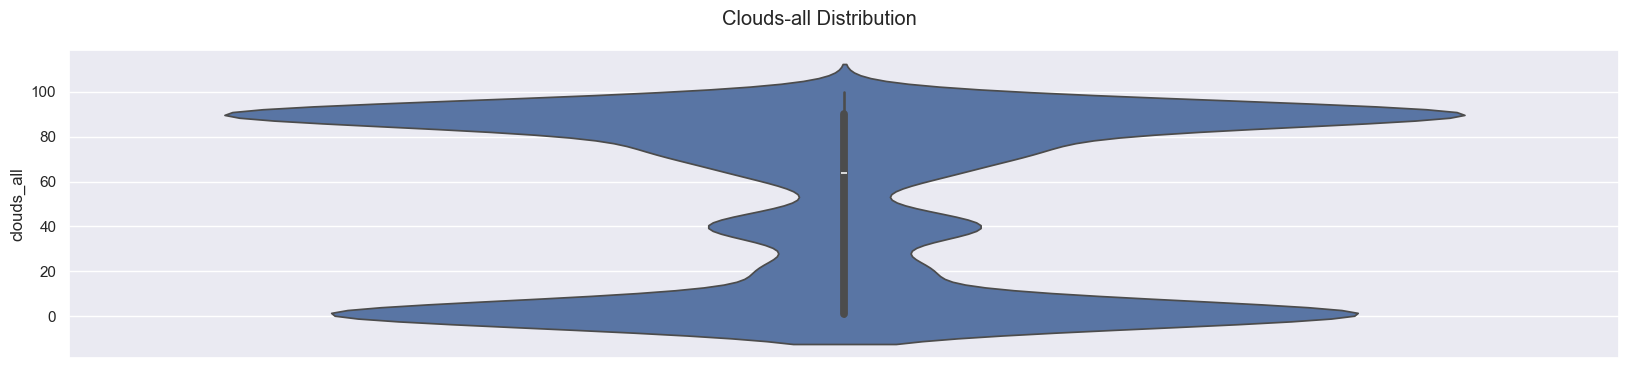

In [71]:
fig, ax = plt.subplots(figsize=(20,4))
fig.suptitle('Clouds-all Distribution')
sns.violinplot(data['clouds_all'])
plt.show()

CLOUDS vs Traffic volume

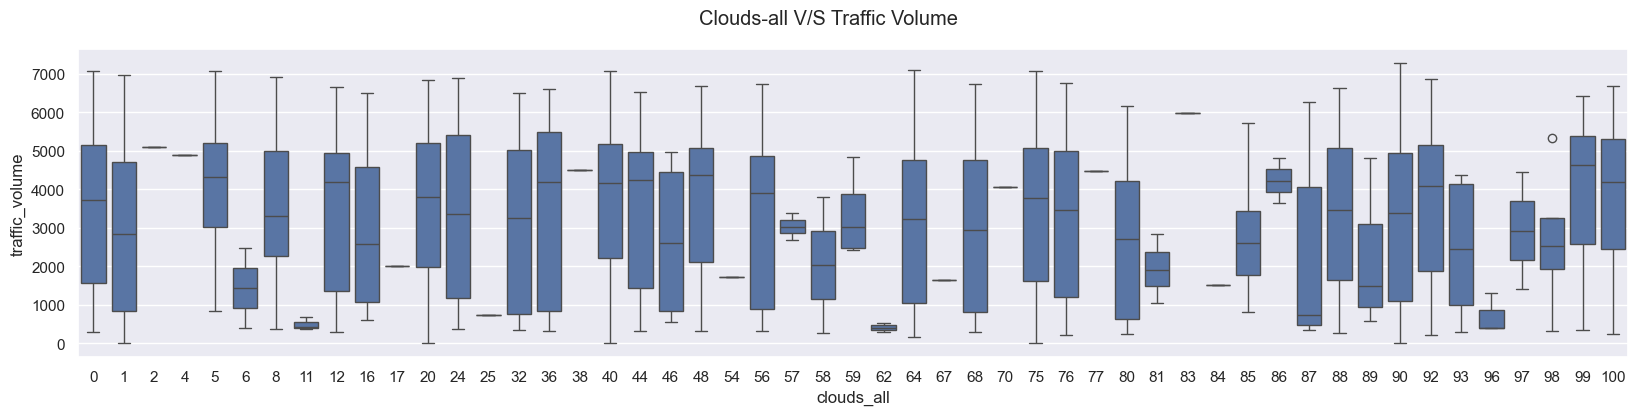

In [72]:
fig, ax = plt.subplots(figsize=(20,4))
fig.suptitle('Clouds-all V/S Traffic Volume')
sns.boxplot(x=data['clouds_all'],y=data['traffic_volume'])
plt.show()

Yaha se model building chalu boss

X = data[features] # 9 features
Y = data[target] # traffic volume

In [29]:
x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)
y_scaler = MinMaxScaler()
Y = y_scaler.fit_transform(Y).flatten()
warnings.filterwarnings('ignore')

In [30]:
print(X[:5])

[[1.         0.83512847 0.33333333 0.04347826 0.33333333 1.
  0.         0.2        0.11111111]
 [0.         0.88917726 0.66666667 0.65217391 0.56666667 0.8
  0.90909091 0.7        0.30555556]
 [0.         0.91947833 1.         0.52173913 0.33333333 0.
  0.90909091 0.4        0.16666667]
 [1.         0.89375162 0.66666667 0.34782609 0.33333333 0.6
  1.         0.2        0.11111111]
 [0.         0.93913833 0.         0.43478261 0.7        0.2
  0.54545455 0.         0.36111111]]


aagaya hero apna, Deep Learning using Multi Layered Perceptron 
|| Initial run: used relu activation, jisse mapping mein gadbad hogayi kyunki MinMax use kiya tha
|| merko isme 2 din lage samajhne mein ki data change hone pe mlp alag train kyu ho raha
|| Final run: used sigmoid, jisse 0 to 1 ke beech mein map hogaye values

In [31]:
khela = MLPRegressor(random_state=1, max_iter=500, hidden_layer_sizes=(100, 75, 50, 25, 20), activation = 'logistic').fit(X, Y)
new = []
print('predicted output :=', khela.predict(X[:500]))
print('Actual output :=', Y[:500])
khela

predicted output := [0.05587473 0.66254606 0.66191143 0.61762862 0.66220071 0.06332891
 0.0568454  0.36870676 0.50687091 0.06590941 0.66177945 0.32357512
 0.48072628 0.6639951  0.66012609 0.66065849 0.65714718 0.65241779
 0.25861788 0.66005444 0.64347162 0.6637853  0.40066174 0.3690084
 0.57953473 0.66054323 0.66253469 0.65193668 0.20905965 0.03879462
 0.62653857 0.21149523 0.37521146 0.38671904 0.06334503 0.66380021
 0.32483469 0.03553173 0.13104708 0.60784553 0.59221685 0.30640412
 0.07648633 0.65959451 0.66331929 0.40337396 0.04642026 0.65728884
 0.66338053 0.4040072  0.44752463 0.66355642 0.03555264 0.66378009
 0.03506495 0.66277764 0.20627767 0.64843617 0.11218224 0.63298159
 0.36111288 0.65702318 0.38749897 0.21440996 0.03526713 0.66255619
 0.65743566 0.64096085 0.6638011  0.66306994 0.26222898 0.57987127
 0.65614742 0.05877467 0.66386231 0.04355173 0.6469558  0.64433343
 0.46661774 0.35051761 0.33443091 0.51358524 0.66310876 0.06877098
 0.06616676 0.66147077 0.0350847  0.5625276

MLPRegressor(activation='logistic', hidden_layer_sizes=(100, 75, 50, 25, 20),
             max_iter=500, random_state=1)

Dump #2

In [32]:
# with open('weights.pkl', 'wb') as f:
#     pickle.dump(khela, f)

In [33]:
pickle.dumps(khela)

b'\x80\x04\x95\x80\x14\x01\x00\x00\x00\x00\x00\x8c-sklearn.neural_network._multilayer_perceptron\x94\x8c\x0cMLPRegressor\x94\x93\x94)\x81\x94}\x94(\x8c\nactivation\x94\x8c\x08logistic\x94\x8c\x06solver\x94\x8c\x04adam\x94\x8c\x05alpha\x94G?\x1a6\xe2\xeb\x1cC-\x8c\nbatch_size\x94\x8c\x04auto\x94\x8c\rlearning_rate\x94\x8c\x08constant\x94\x8c\x12learning_rate_init\x94G?PbM\xd2\xf1\xa9\xfc\x8c\x07power_t\x94G?\xe0\x00\x00\x00\x00\x00\x00\x8c\x08max_iter\x94M\xf4\x01\x8c\x04loss\x94\x8c\rsquared_error\x94\x8c\x12hidden_layer_sizes\x94(KdKKK2K\x19K\x14t\x94\x8c\x07shuffle\x94\x88\x8c\x0crandom_state\x94K\x01\x8c\x03tol\x94G?\x1a6\xe2\xeb\x1cC-\x8c\x07verbose\x94\x89\x8c\nwarm_start\x94\x89\x8c\x08momentum\x94G?\xec\xcc\xcc\xcc\xcc\xcc\xcd\x8c\x12nesterovs_momentum\x94\x88\x8c\x0eearly_stopping\x94\x89\x8c\x13validation_fraction\x94G?\xb9\x99\x99\x99\x99\x99\x9a\x8c\x06beta_1\x94G?\xec\xcc\xcc\xcc\xcc\xcc\xcd\x8c\x06beta_2\x94G?\xef\xf7\xce\xd9\x16\x87+\x8c\x07epsilon\x94G>Ey\x8e\xe20\x8c:\x

In [38]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.7)
y_pred = khela.predict(testX)
print('Mean Absolute Error:', mean_absolute_error(testY, y_pred))

Mean Absolute Error: 0.08840638009433319


In [39]:
root_mean_squared_error(testY, y_pred)

0.12869720148907912

In [40]:
mean_squared_error(testY, y_pred)

0.01656296967112063

In [82]:
metric_dictionary = {'Mean Squared Error': mean_squared_error(testY, y_pred),
                     'Root Mean Squared Error' : root_mean_squared_error(testY, y_pred)
                     }
with open('metric_dump.pkl', 'wb') as f:
    pickle.dump(metric_dictionary, f)

X takes input in the form of:

*   is_holiday (0 for No, 1 for Yes)

*   temperature	(ranging from 0 to 32)

*     weekday	(kaunsa din hai hafte ka)

*   hour	(in the format of 24h)


*   month_day	(what is the date)


*   year


*   month


*   weather_type	(from 1 to 11 ranging according to the weather type list)

*   weather_description (from 1 to 32 ranging according to the description list)


New data pe kaisa chalra hai MLP

In [75]:
unseen_data = [1, 17, 5, 3, 22, 2015, 6, 1, 24]
print(type(unseen_data))
unseen_data = x_scaler.transform([unseen_data])
print(unseen_data)
results = khela.predict(unseen_data)
print('Before inverse Scaling :', results)

<class 'list'>
[[1.         0.90189463 0.66666667 0.13043478 0.7        0.6
  0.45454545 0.         0.66666667]]
Before inverse Scaling : [0.03729009]


In [78]:
pred_y = y_scaler.inverse_transform([results])
print('Traffic Volume : ', pred_y[0][0])

Traffic Volume :  272.4345348745667


In [79]:
if(pred_y<=1300):
  print("No Traffic at all, enjoy your journey. Be safe :) ")
elif pred_y > 1300 and pred_y <= 1700:
  print("Seems a little bit busy, but you'll get there :P ")
elif pred_y > 1700 and pred_y <= 3500:
  print("Might as well carry your headphones or keep your playlist ready, heavy traffic ahead :( ")
else:
  print("Whoops! Consider cancelling your plans today, or delay it a bit; it's a roadblock")

No Traffic at all, enjoy your journey. Be safe :) 
